In [3]:
# inspired by https://github.com/karpathy/makemore

words = open('names.txt', 'r').read().splitlines()

In [4]:
print(f'words[:1] = {words[:1]}')
print(f'len(words) = {len(words)}')

words[:1] = ['emma']
len(words) = 32033


In [5]:
# split dataset

import numpy as np
from torch.utils.data import Subset, DataLoader

indices = np.arange(len(words))
indices = np.random.permutation(indices)

train_indices = indices[:int(0.8*len(words))]
dev_indices = indices[int(0.8*len(words)):int(0.9*len(words))]
test_indices = indices[int(0.9*len(words)):int(len(words))]

train_set = Subset(words, train_indices)
dev_set = Subset(words, dev_indices)
test_set = Subset(words, test_indices)

train_dl = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)
dev_dl = DataLoader(dev_set, shuffle=True ,batch_size=4, num_workers=2)
test_dl = DataLoader(test_set, shuffle=True,batch_size=4, num_workers=2)

print(f'train_set length = {len(train_dl)}, dev_set length = {len(dev_dl)}, test_set length = {len(test_dl)}, total = {len(train_set) + len(dev_set) + len(test_set)}')

train_set length = 6407, dev_set length = 801, test_set length = 801, total = 32033


In [6]:
for batch, V in enumerate(train_dl):
  if batch % 100 == 0:
    print(f'Batch = {batch}, Value = {V}')

Batch = 0, Value = ['makylah', 'jennavieve', 'adaiah', 'andersen']
Batch = 100, Value = ['rayley', 'july', 'jahmari', 'carma']
Batch = 200, Value = ['sarim', 'zyrie', 'saunders', 'amiaya']
Batch = 300, Value = ['noria', 'rheign', 'samarth', 'eliannie']
Batch = 400, Value = ['ajani', 'lojain', 'chiziterem', 'hilario']
Batch = 500, Value = ['janai', 'jakiah', 'moshe', 'journie']
Batch = 600, Value = ['shmiel', 'mana', 'brenleigh', 'evalina']
Batch = 700, Value = ['samyar', 'macklyn', 'corrin', 'zaiah']
Batch = 800, Value = ['ryon', 'jaileen', 'nyliah', 'lucis']
Batch = 900, Value = ['valaya', 'harlee', 'gowri', 'melly']
Batch = 1000, Value = ['brighten', 'kandace', 'hyland', 'jaimie']
Batch = 1100, Value = ['feyza', 'stormy', 'dreyah', 'flynn']
Batch = 1200, Value = ['raelyn', 'leyna', 'annabella', 'cody']
Batch = 1300, Value = ['ramos', 'cashius', 'brynne', 'kalder']
Batch = 1400, Value = ['aryani', 'kalana', 'mylez', 'mosley']
Batch = 1500, Value = ['ayan', 'thea', 'irelyn', 'gerald']


In [7]:
import torch

N = torch.zeros((27, 27, 27), dtype=torch.int32)

chars = sorted(set(list(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos
# stoi

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [8]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    # print(ix1, ix2, ix3)
    N[ix1, ix2, ix3] += 1

# N[0, 5, 13]

In [9]:
P = (N+1).float()
P /= P.sum(2, keepdims=True)
P[0, 0].sum()
P.shape

torch.Size([27, 27, 27])

In [12]:
g = torch.Generator().manual_seed(2147483647)
p = P[0, 0]
torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

3

In [13]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out =[]
    ix1 = 0
    ix2 = 0
    while True:
        p = P[ix1, ix2]
        ix1 += 1 # for no obvious reason
        ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix2])
        if ix2==0:
            break
    print(''.join(out))

cexzm.
zeale.
riror.
kayha.
vinimitta.


In [14]:
log_likely_hood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1, ix2, ix3]
    logprob = torch.log(prob)
    log_likely_hood += logprob
    n+=1

print(f'{log_likely_hood=}')
nnl = -log_likely_hood
print(f'{nnl=}')
print(f'{nnl/n}')

log_likely_hood=tensor(-410414.9688)
nnl=tensor(410414.9688)
2.092747449874878


In [15]:
xs, ys = [], []

for w in words[:1]:
  print(w)
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append(ix1)
    xs.append(ix2)
    ys.append(ix3)
    

xs = torch.tensor(xs)
ys = torch.tensor(ys)

emma


In [16]:
import random

ls = []
xs, ys = [], []

for _, wd in enumerate(train_dl):
  xl = random.choice(wd)
  ls.append(xl)

for w in ls[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append(ix1)
    xs.append(ix2)
    ys.append(ix3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


# print(list(ls[:1][0]))


In [17]:
xs.shape

torch.Size([14])

In [18]:
ys.shape

torch.Size([7])

In [19]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

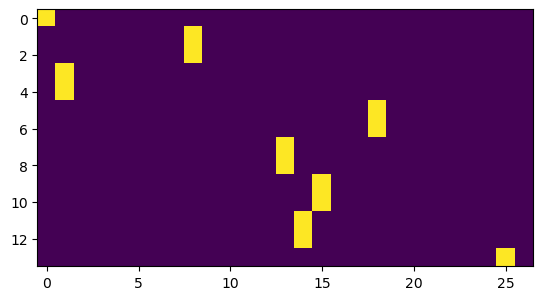

In [21]:
import matplotlib.pyplot as plt 
plt.imshow(xenc)

In [22]:
xenc.shape

torch.Size([14, 27])

In [ ]:
W = torch.randn((27, 27))
xenc @ W

In [ ]:
(xenc @ W)[3, 13]

In [78]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()
logits = W[xs]
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
loss = -probs[torch.arange(ys.shape[0]), ys].log().mean()

In [77]:
loss.item()

4.1517109870910645

In [75]:
W.grad = None
loss.backward()

In [76]:
W.data = -100 * W.grad

In [88]:
# gradient descent
for k in range(100):
  
  # if loss.item() < 2.05:
  #   break
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = W[xs]
  # logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(ys.shape[0]), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -0.08 * W.grad

2.91740345954895
2.905158519744873
2.8929481506347656
2.880772829055786
2.8686327934265137
2.8565282821655273
2.844459295272827
2.832425832748413
2.8204286098480225
2.808467149734497
2.796541690826416
2.7846531867980957
2.7728004455566406
2.7609851360321045
2.749206304550171
2.737464666366577
2.725759983062744
2.71409273147583
2.702463150024414
2.690871477127075
2.6793172359466553
2.6678011417388916
2.656322956085205
2.644883155822754
2.633481979370117
2.622119188308716
2.610795259475708
2.5995101928710938
2.5882644653320312
2.577057361602783
2.565890073776245
2.554762125015259
2.543673515319824
2.5326249599456787
2.521615982055664
2.5106472969055176
2.499718427658081
2.4888298511505127
2.47798228263855
2.467174768447876
2.4564077854156494
2.4456818103790283
2.4349963665008545
2.4243521690368652
2.4137492179870605
2.4031870365142822
2.3926665782928467
2.382187843322754
2.3717498779296875
2.361354112625122
2.3509998321533203
2.3406875133514404
2.3304171562194824
2.3201887607574463
2.310

In [89]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix1 = 0
  ix2 = 0
  while True:
  
    ix1 = ix2 # for no obvious reason, but it gives better results than `ix2 = ix2`
    xenc = F.one_hot(torch.tensor([ix1]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

 

zexzmkloglquszipczv.
yhkmpmzistttrinmlgdukzkktda.
pgmxtpucjwtsc.
gmtokmxczisllwxugkwpt.
darmkluydjmszdgu.


In [93]:
# testing the loss on the testing set

import random

ls = []
xs, ys = [], []

for _, wd in enumerate(test_dl):
  xl = random.choice(wd)
  ls.append(xl)

for w in ls[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append(ix1)
    xs.append(ix2)
    ys.append(ix3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


nlls = torch.zeros(5)
for i in range(4):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'trigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x, x+1)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
trigram example 1: .a (indexes 0,1)
input to the neural net: 0 1
output probabilities from the neural net: tensor([0.0434, 0.3747, 0.0107, 0.0038, 0.0143, 0.0106, 0.0024, 0.0191, 0.0118,
        0.0250, 0.0070, 0.0225, 0.0080, 0.0072, 0.0371, 0.1038, 0.0432, 0.0023,
        0.0204, 0.0049, 0.0268, 0.0095, 0.0026, 0.0166, 0.0102, 0.0823, 0.0798],
       grad_fn=<SelectBackward0>)
label (actual next character): 1
probability assigned by the net to the the correct character: 0.37470245361328125
log likelihood: -0.9816230535507202
negative log likelihood: 0.9816230535507202
--------
trigram example 2: ns (indexes 14,19)
input to the neural net: 14 15
output probabilities from the neural net: tensor([0.0505, 0.0234, 0.0092, 0.0037, 0.0166, 0.0116, 0.0104, 0.0245, 0.0193,
        0.1959, 0.0104, 0.0192, 0.0102, 0.0220, 0.0180, 0.0313, 0.0328, 0.0234,
        0.0446, 0.0314, 0.0390, 0.0286, 0.0918, 0.1107, 0.0636, 0.0156, 0.0423],
       grad_fn=<SelectBackward0>)
label (actual next 